In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

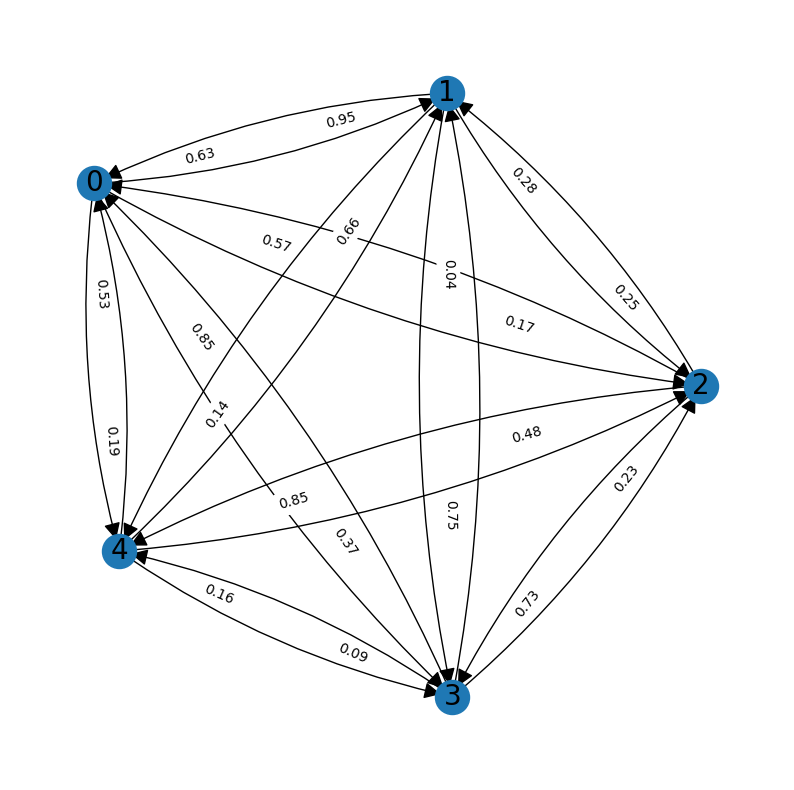

In [2]:
from Simulation import *

from Environment import *


click_probabilities = generate_click_probabilities(fully_connected=True)
observations_probabilities = generate_observation_probabilities(click_probabilities=click_probabilities)

concentration_params = [100] + [70] * NUM_OF_PRODUCTS
alpha_users = np.random.dirichlet( alpha= concentration_params, size = 1)


product_prices, users_reservation_prices = generate_prices(product_range=100, users_range=100)
tot_num_users = np.random.normal(loc=1000, scale=50)


env = Environment(users_reservation_prices = users_reservation_prices,
                    click_probabilities = click_probabilities,
                    observations_probabilities = observations_probabilities,
                    tot_num_users = tot_num_users)

Network.print_graph(G=env.network.G)

In [3]:
nodes_activation_probabilities = env.compute_nodes_activation_probabilities(product_prices=product_prices)

k: 100%|██████████| 4688/4688 [00:01<00:00, 2510.04it/s]


In [5]:
B_cap = 100
budgets = np.linspace(start = 0, stop = B_cap, num= 11, endpoint=True)

In [32]:
from Ecommerce_step3 import *

In [9]:
ecomm3 = Ecommerce_step3(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)

In [33]:
ecomm3.pull_arm(nodes_activation_probabilities=nodes_activation_probabilities)


array([44.44444444, 11.11111111,  0.        ,  0.        , 33.33333333])

In [ ]:

for _ in range(100):
    arms_values = ecomm3.pull_arm(nodes_activation_probabilities=nodes_activation_probabilities)
    print(arms_values)
    reward = env.round(pulled_arm=arms_values)
    ecomm3.update(pulled_arm = arms_values, reward = reward)